In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

2025-10-22 00:42:23.064201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-22 00:42:23.232058: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-22 00:42:23.238719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-10-22 00:42:23.238743: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

Data Preprocessing 
    Training Image Preprocessing
    

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
   r'Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


2025-10-22 00:42:34.923487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-22 00:42:34.928147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-10-22 00:42:34.928233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2025-10-22 00:42:34.928292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2025-10-22 00:42:34.928347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
   r'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


Building Model 
 

In [5]:
from tensorflow.keras.layers import Dense , Conv2D ,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

Building Convolution Layer

In [7]:
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same',activation = 'relu',input_shape = [128,128,3]))
model.add(Conv2D(filters = 32,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [8]:
model.add(Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 64,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [9]:
model.add(Conv2D(filters = 128,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 128,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [10]:
model.add(Conv2D(filters = 256,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 256,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [11]:
model.add(Conv2D(filters = 512,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 512,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [12]:
model.add(Dropout(0.25)) #To avoid Overfitting 

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units = 1500 , activation = 'relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
#Output Layer 
model.add(Dense(units =38,activation = 'softmax'))

Compiling Model 

In [17]:
model.compile(optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Model Training 


In [19]:
training_history = model.fit(x = training_set,validation_data = validation_set,epochs = 10)

Epoch 1/10


  22/2197 [..............................] - ETA: 39:50 - loss: 3.7233 - accuracy: 0.0256

KeyboardInterrupt: 

Modal Evaluation On training set 


In [19]:
train_loss,train_acc = model.evaluate(training_set)
print(train_loss,train_acc)

2197/2197 [==============================] - 55s 25ms/step - loss: 0.0363 - accuracy: 0.9882
0.036263901740312576 0.9882209300994873


Model Evaluation on Validation set 

In [20]:
val_loss,val_acc = model.evaluate(validation_set)
print(train_loss,train_acc)

539/539 [==============================] - 13s 25ms/step - loss: 0.1362 - accuracy: 0.9592
0.036263901740312576 0.9882209300994873


Saving Model 

In [21]:
model.save("trained_model.keras")


In [22]:
training_history.history 

{'loss': [1.3905962705612183,
  0.45814552903175354,
  0.278876930475235,
  0.19134314358234406,
  0.14194898307323456,
  0.10876283049583435,
  0.09331674873828888,
  0.07969310134649277,
  0.06464827805757523,
  0.05671621486544609],
 'accuracy': [0.5938771367073059,
  0.8554499745368958,
  0.9110023379325867,
  0.9382593035697937,
  0.9532250165939331,
  0.9641505479812622,
  0.9687597751617432,
  0.9732409715652466,
  0.9785045385360718,
  0.981634259223938],
 'val_loss': [0.5526487231254578,
  0.3198050260543823,
  0.27468517422676086,
  0.20258459448814392,
  0.12236382067203522,
  0.15993711352348328,
  0.14119070768356323,
  0.12573421001434326,
  0.13848309218883514,
  0.13618960976600647],
 'val_accuracy': [0.8278745412826538,
  0.9000580906867981,
  0.9092334508895874,
  0.9362950325012207,
  0.9605690836906433,
  0.9508129954338074,
  0.9572009444236755,
  0.9617885947227478,
  0.9585365653038025,
  0.9591753482818604]}

Recording Model History 

In [23]:
import json
with open("training_hist.json" , "w") as f :
    json.dump(training_history.history,f)

Acuuracy Visulization


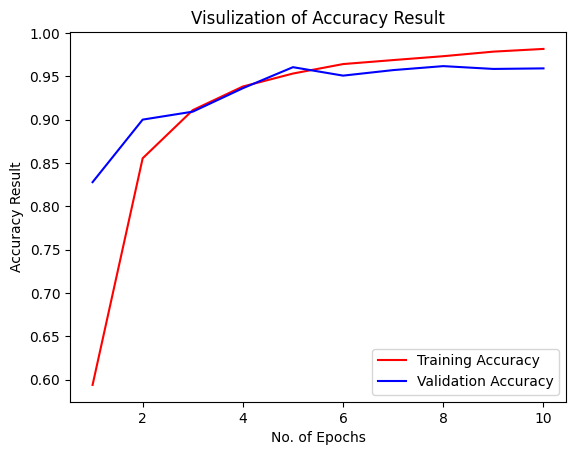

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs , training_history.history['accuracy'],color = 'red',label = 'Training Accuracy')
plt.plot(epochs , training_history.history['val_accuracy'],color = 'blue',label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Accuracy Result")
plt.legend()
plt.show()

Some Other metrics for model evaluation 

In [25]:
class_name = validation_set.class_names
class_name 

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
   r'C:\Users\PRANAV JADHAV\Desktop\MP\Plant_Disease_Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17220 files belonging to 38 classes.


In [27]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

539/539 [==============================] - 13s 23ms/step


(array([[1.00000000e+00, 4.01126456e-08, 8.79972397e-12, ...,
         1.42592978e-15, 1.29278929e-14, 6.82009110e-14],
        [9.99978065e-01, 2.00577944e-07, 4.88122387e-09, ...,
         5.84922041e-12, 4.16992873e-12, 1.40602694e-11],
        [1.00000000e+00, 3.54356260e-08, 9.09090945e-12, ...,
         1.13515906e-17, 7.47660842e-16, 4.39915065e-14],
        ...,
        [7.33034640e-12, 2.71939724e-14, 1.73089348e-10, ...,
         1.36472819e-10, 3.24624529e-12, 9.99999642e-01],
        [2.18902656e-11, 4.99523654e-14, 9.12139669e-11, ...,
         3.81569720e-10, 9.45815475e-12, 1.00000000e+00],
        [2.89660819e-13, 1.62352552e-15, 2.71413599e-12, ...,
         1.93011924e-14, 1.49596724e-11, 1.00000000e+00]], dtype=float32),
 (17220, 38))

In [28]:
predicted_categories = tf.argmax(y_pred,axis = 1)

In [29]:
predicted_categories

<tf.Tensor: shape=(17220,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
true_categories = tf.concat([y for x,y in test_set], axis = 0 )
true_categories

<tf.Tensor: shape=(17220, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [31]:
Y_true = tf.argmax(true_categories,axis = 1)
Y_true

<tf.Tensor: shape=(17220,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

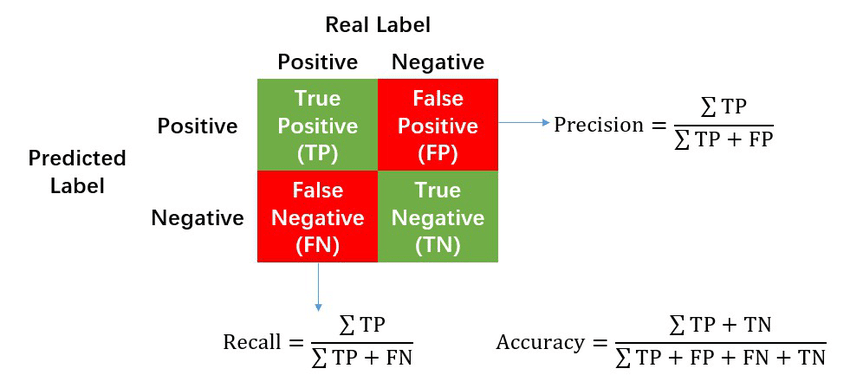


In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(Y_true , predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.94      0.94       152
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.99      0.95      0.97       502
                               Blueberry___healthy       1.00      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.87      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

In [34]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

Confusion Matrics Visulization

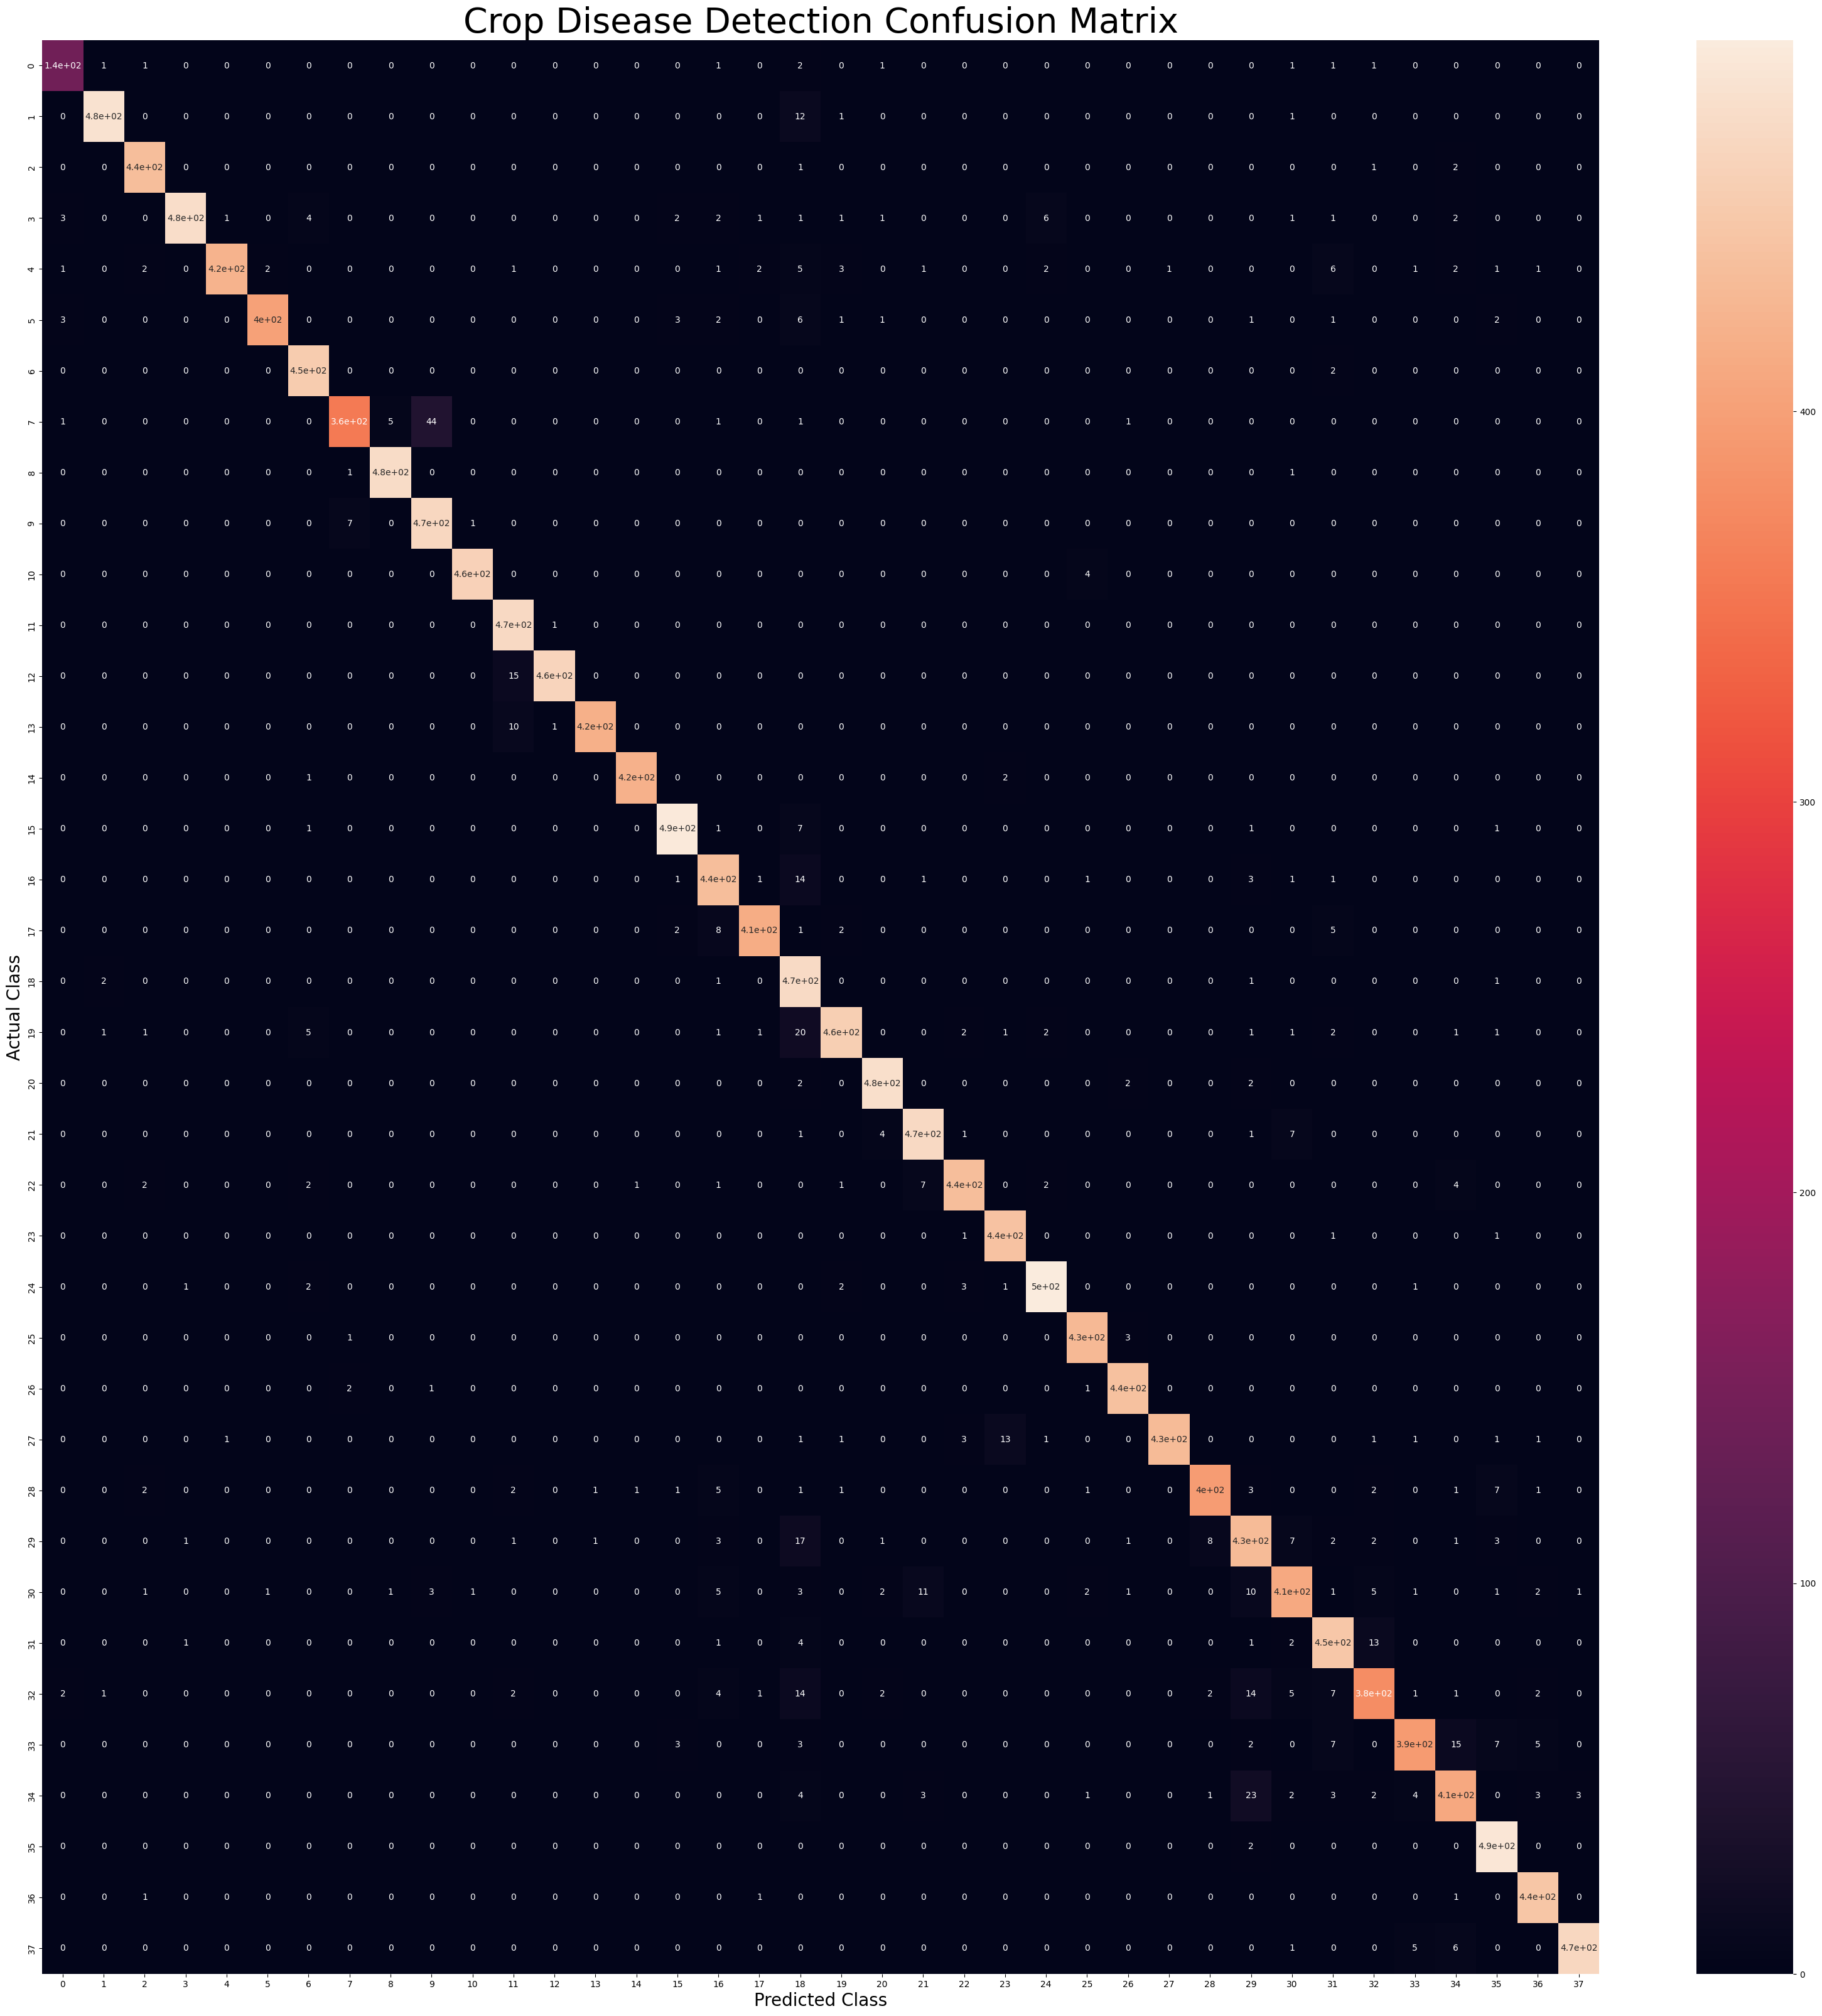

In [35]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot = True ,annot_kws = {'size' : 10})
plt.xlabel("Predicted Class",fontsize = 20)
plt.ylabel("Actual Class",fontsize = 20)
plt.title("Crop Disease Detection Confusion Matrix",fontsize = 40)
plt.show()